In [1]:
from scipy.stats import norm, beta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.reset_defaults()

In [2]:
def get_reward(x):
    noise = np.random.randn() * 0.1
    if x < -1 or x > -0.8:
        return noise
    else:
        return noise + 1

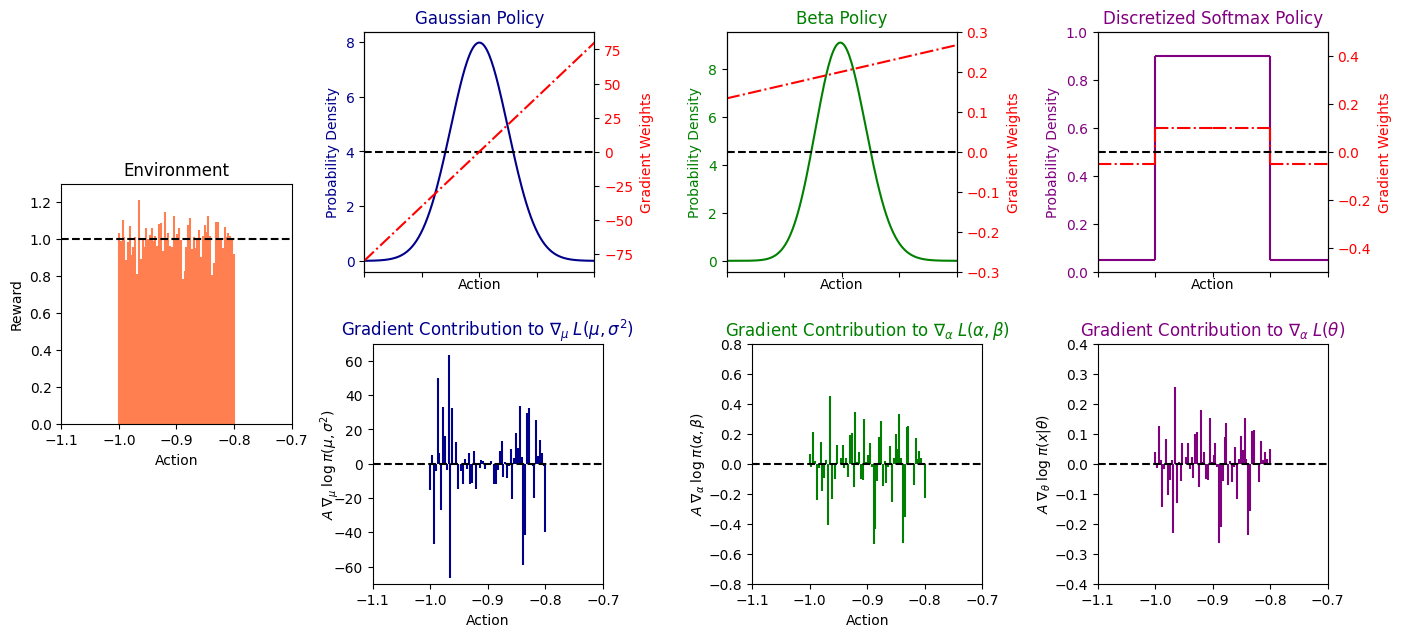

In [3]:
mu = -0.9
sigma = 0.05
rvnorm = norm(loc=mu, scale=sigma)
x_uniform = np.linspace(-1.1, -0.7, 200)
fig, axes = plt.subplots(2, 4, figsize=(17, 8), sharex=True)
axes = axes.flatten()
fig.delaxes(axes[0])
fig.subplots_adjust(top=0.8, wspace=0.5, right=0.87, hspace=0.3)


ax_gaussian_pdf = axes[1]
ax_gaussian_pdf.plot(x_uniform, rvnorm.pdf(x_uniform), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='darkblue')
ax_gaussian_pdf.tick_params(axis='y', labelcolor='darkblue')
ax_gaussian_pdf.set_ylabel('Probability Density',color='darkblue')
ax_gaussian_pdf.set_xlabel('Action')
ax_gaussian_pdf.set_title('Gaussian Policy', color='darkblue')
#axes[0].set_xlim([-1.1, -0.7])
ax_gaussian_score = ax_gaussian_pdf.twinx()
smu_uniform = (x_uniform - mu) / (sigma ** 2)
ax_gaussian_score.plot(x_uniform, smu_uniform, linestyle='-.', label=r'Score Function $\frac{\partial}{\partial \mu}\log \pi(x|\mu,\sigma^2)$', color='red')
#ax_gaussian_score.set_ylabel(r'Gradient weights: $\nabla_{\mu}\; \log\;\pi(a|\mu,\sigma^2)$',color='red', labelpad=5)
ax_gaussian_score.set_ylabel(r'Gradient Weights',color='red', labelpad=5)
ax_gaussian_score.tick_params(axis='y', labelcolor='red')
ax_gaussian_score.hlines(0, -1.1, -0.7, ls='--')



ax_rew = axes[4]
ax_rew.set_ylabel('Reward')
#x_normsamples = np.sort(rvnorm.rvs(64))
x_normsamples = np.linspace(-1.0, -0.8, 64)
rewards = np.vectorize(get_reward)(x_normsamples)
for i in range(len(x_normsamples)):
    ax_rew.vlines(x_normsamples[i], 0, rewards[i], color='coral')
ax_rew.set_ylim([0, 1.3])
ax_rew.set_xlim([-1.1, -0.7])
ax_rew.hlines(1, -1.1, -0.7, ls='--')
ax_rew.set_xlabel('Action')
ax_rew.set_title('Environment')
box = ax_rew.get_position()
box.y0 = box.y0 + 0.2
box.y1 = box.y1 + 0.2
ax_rew.set_position(box)

# grad_mu (log pi(theta))
smu = (x_normsamples - mu) / (sigma ** 2)
# policy gradient on mu
gradmu = (rewards - np.mean(rewards)) / np.std(rewards) * smu


ax_guassian_grad = axes[5]
#ax_beta_grad.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax_guassian_grad.vlines(x_normsamples[i], 0, gradmu[i], color='darkblue')
ax_guassian_grad.set_ylabel(r'$A\;\nabla_{\mu}\; \log\;\pi(\mu,\sigma^2)$',labelpad=-5)
ax_guassian_grad.set_title(r'Gradient Contribution to $\nabla_\mu\;L(\mu,\sigma^2)$', color='darkblue')
ax_guassian_grad.tick_params(axis='y')
ax_guassian_grad.hlines(0, -1.1, -0.7, ls='--')
ax_guassian_grad.set_xlabel('Action')
ax_guassian_grad.set_ylim([-70, 70])

############################################################################### Beta #############

rvbeta = beta(a=150, b=600, loc=-1.5, scale=3)
ax_beta_pdf = axes[2]
ax_beta_pdf.plot(x_uniform, rvbeta.pdf(x_uniform), linestyle='-', color='green')
ax_beta_pdf.tick_params(axis='y', labelcolor='green')
ax_beta_pdf.set_ylabel('Probability Density',color='green')
ax_beta_pdf.set_xlabel('Action')
ax_beta_pdf.set_title('Beta Policy', color='green')
#axes[0].set_xlim([-1.1, -0.7])
ax_beta_score = ax_beta_pdf.twinx()
ax_beta_score.set_ylim([-0.3, 0.3])
salpha_uniform = (x_uniform - (-1.5)) / 3
ax_beta_score.plot(x_uniform, salpha_uniform, linestyle='-.', label=r'Score Function $\frac{\partial}{\partial \alpha}\log \pi(x|\alpha,\beta)$', color='red')
#ax_beta_score.set_ylabel(r'Gradient weights: $\nabla_{\alpha}\; \log\;\pi(a|\alpha, \beta)$',color='red', labelpad=5)
ax_beta_score.set_ylabel(r'Gradient Weights',color='red', labelpad=5)
ax_beta_score.tick_params(axis='y', labelcolor='red')
ax_beta_score.set_xlabel('Action')
ax_beta_score.hlines(0, -1.1, -0.7, ls='--')


# log likelihood is (a-1)x+ (b-1)(1-x)
salpha = (x_normsamples - (-1.5)) / 3
gradalpha = (rewards - np.mean(rewards)) / np.std(rewards) * salpha
#axes[1].plot(x, s)
ax_beta_grad = axes[6]
#ax_beta_grad.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax_beta_grad.vlines(x_normsamples[i], 0, gradalpha[i], color='green')
ax_beta_grad.set_ylabel(r'$A\;\nabla_{\alpha}\; \log\;\pi(\alpha,\beta)$',labelpad=1)
ax_beta_grad.set_title(r'Gradient Contribution to $\nabla_\alpha\;L(\alpha, \beta)$', color='green')
ax_beta_grad.tick_params(axis='y')
ax_beta_grad.hlines(0, -1.1, -0.7, ls='--')
ax_beta_grad.set_ylim([-.8, .8])
#ax_beta_grad.plot(x_uniform, s_uniform)
ax_beta_grad.set_xlabel('Action')
########################################################################

ax_disc_pdf = axes[3]
x_disc = np.linspace(-1.1, -0.7, 5)
p = [0.05, 0.9, 0.9, 0.05]
for j, xx in enumerate(p):
    ax_disc_pdf.hlines(p[j], x_disc[j], x_disc[j+1], linestyle='-',color='purple')
    if j < len(p)-1:
        ax_disc_pdf.vlines(x_disc[j+1], p[j], p[j+1], color='purple')
ax_disc_pdf.tick_params(axis='y', labelcolor='purple')
ax_disc_pdf.set_ylabel('Probability Density',color='purple')
ax_disc_pdf.set_xlabel('Action')
ax_disc_pdf.set_title('Discretized Softmax Policy', color='purple')
ax_disc_pdf.set_ylim([0, 1])
#axes[0].set_xlim([-1.1, -0.7])
ax_disc_score = ax_disc_pdf.twinx()
#ax_disc_score.set_ylim([-0.3, 0.3])
score_disc = [-0.05, 1-0.9, 1-0.9, -0.05]
for j, xx in enumerate(score_disc):
    ax_disc_score.hlines(score_disc[j], x_disc[j], x_disc[j+1], linestyle='-.',color='red')
    if j < len(score_disc)-1:
        ax_disc_score.vlines(x_disc[j+1], score_disc[j], score_disc[j+1], linestyle='-.', color='red')
#ax_disc_score.set_ylabel(r'Gradient weights: $\nabla_{\theta}\; \log\;\pi(a|\theta)$',color='red', labelpad=5)
ax_disc_score.set_ylabel(r'Gradient Weights',color='red', labelpad=5)
ax_disc_score.tick_params(axis='y', labelcolor='red')
ax_disc_score.set_xlabel('Action')
ax_disc_score.hlines(0, -1.1, -0.7, ls='--')
ax_disc_score.set_ylim([-.5, .5])

# log likelihood is (a-1)x+ (b-1)(1-x)
adv = (rewards - np.mean(rewards)) / np.std(rewards)
#axes[1].plot(x, s)
ax_disc_grad = axes[7]
grad_softmax = np.zeros_like(x_normsamples)
for j, xx in enumerate(x_normsamples):
    for i in range(4):
        if xx >= x_disc[i] and xx < x_disc[i+1]:
            grad_softmax[j] = score_disc[i] * adv[j]
#ax_beta_grad.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax_disc_grad.vlines(x_normsamples[i], 0, grad_softmax[i], color='purple')
ax_disc_grad.set_ylabel(r'$A\;\nabla_{\theta}\; \log\;\pi(x|\theta)$',labelpad=1)
ax_disc_grad.set_title(r'Gradient Contribution to $\nabla_\alpha\;L(\theta)$', color='purple')
ax_disc_grad.tick_params(axis='y')
ax_disc_grad.hlines(0, -1.1, -0.7, ls='--')
ax_disc_grad.set_ylim([-.4, .4])
#ax_beta_grad.plot(x_uniform, s_uniform)
ax_beta_grad.set_xlabel('Action')


########################################################################

box = ax_gaussian_pdf.get_position()
box.x0 = box.x0 - 0.025
box.x1 = box.x1 - 0.025
ax_gaussian_pdf.set_position(box)
box = ax_beta_pdf.get_position()
box.x0 = box.x0 - 0.015
box.x1 = box.x1 - 0.015
ax_beta_pdf.set_position(box)
box = ax_guassian_grad.get_position()
box.x0 = box.x0 - 0.02
box.x1 = box.x1 - 0.02
ax_guassian_grad.set_position(box)
#fig.legend(loc='upper center', ncol=4)
plt.show()